#### Semana 4 - Aprendizado por reforço

### Apresentação do ambiente

Vamos iniciar com um ambiente simples, um "labirinto" unidimensional.

Imagine o labirinto abaixo:

[$\mathrm{Buraco}$] [$\qquad$] [$\qquad$] [$\qquad$] [$\qquad$]  [ $\mathrm{Partida}$ ] [$\qquad$] [$\qquad$] [$\qquad$] [ $\mathrm{Chegada}$ ]

O agente, que inicia sua trajetória na casa "Partida", por escolher entre duas ações:
- $-1$: andar para trás;
- $+1$: andar para frente.

Cada vez que ele realiza uma ação, o agente recebe uma recompensa de -1 ponto. Quando ele atinge a casa de "Chegada", o agente recebe uma recompensa de 10 ponto.

In [ ]:
import numpy as np

# Definição do ambiente
goal_position = 10
state = 0  # Posição inicial
actions = [-1, 1]  # Andar para trás ou para frente
episodes = 10 # Número de ações a serem realizadas

# Interação do agente com o ambiente
for step in range(episodes):
    action = np.random.choice(actions)  # Escolha aleatória
    state += action
    reward = 10 if state == goal_position else -1
    print(f"Passo {step + 1}: Ação: {action}, Estado: {state}, Recompensa: {reward}.")

### Q-Learning

Vamos otimizar o funcionamento do agente por meio do algoritmo Q-learning. Vamos utilizar o mesmo problema do labirinto unidimensional.

In [ ]:
import numpy as np

# Parâmetros
states = 4
goal_position = states-1
actions = 2  # 0: esquerda, 1: direita
q_table = np.zeros((states, actions))
alpha = 0.1  # Taxa de aprendizado
gamma = 0.9  # Fator de desconto
epsilon = 0.2  # Taxa de exploração

# Ambiente simples
rewards = -1*np.ones(states-1)  # Recompensa ao alcançar o estado final
rewards = np.append(rewards, 10)

print(f"Os valores de recompensa por estado são:\n{rewards}\n")
print(f"A tabela Q foi inicializada como:\n{q_table}")

Com o vetor de recompensas do ambiente e a tabela Q do agente inicializados, vamos iteragir para termos as melhores escolhas do ambiente.

Imagine o labirinto abaixo:

[ $\mathrm{Partida}$ ] [$\qquad$] [$\qquad$] [$\qquad$] [ $\mathrm{Chegada}$ ]

In [ ]:
# Treinamento
for episode in range(1):
    state = 0  # Estado inicial
    print(f"A tabela Q antes de iniciar o episódio:\n{q_table}")
    while state != goal_position:
        # Escolha da ação
        if np.random.random() < epsilon:
            action = np.random.choice(actions)
        else:
            action = np.argmax(q_table[state])

        # Próximo estado e recompensa
        next_state = state + 1 if action == 1 else max(0, state - 1)
        reward = rewards[next_state]

        # Atualização Q-Learning
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
        state = next_state
        print(f"\nA tabela Q foi atualizada como:\n{q_table}")

# Resultados
print("Tabela Q final:")
print(q_table)

Ao iteragir durante apenas 1 episódio, vemos que a tabela Q convergiu de acordo com as escolhas do agente e seus momentos de aleatoriedade. Vamos ver como vai ser a convergencia depois de vários episódios.

In [ ]:
import numpy as np

# Parâmetros
states = 4
goal_position = states-1
actions = 2  # 0: esquerda, 1: direita
q_table = np.zeros((states, actions))
alpha = 0.1  # Taxa de aprendizado
gamma = 0.9  # Fator de desconto
epsilon = 0.2  # Taxa de exploração

# Ambiente simples
rewards = -1*np.ones(states-1)  # Recompensa ao alcançar o estado final
rewards = np.append(rewards, 10)

print(f"Os valores de recompensa por estado são:\n{rewards}\n")
print(f"A tabela Q foi inicializada como:\n{q_table}")

# Treinamento
for episode in range(10000):
    state = 0  # Estado inicial
    print(f"A tabela Q antes de iniciar o episódio {episode+1}:\n{q_table}")
    while state != goal_position:
        # Escolha da ação (exploração/exploração)
        if np.random.random() < epsilon:
            action = np.random.choice(actions)
        else:
            action = np.argmax(q_table[state])

        # Próximo estado e recompensa
        next_state = state + 1 if action == 1 else max(0, state - 1)
        reward = rewards[next_state]

        # Atualização Q-Learning
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
        state = next_state

# Resultados
print(f"Tabela Q final, depois de {episode+1} episódios:\n{q_table}")

Tabela Q final (1 episódio):
- [[-0.3529 -0.271 ]
-  [-0.2152 -0.19  ]
-  [-0.109   1.    ]
-  [ 0.      0.    ]]

Tabela Q final, depois de 10 episódios:
- [[-0.58519851 -0.35079619]
-  [-0.4477676   1.68892023]
-  [-0.109       6.5132156 ]
-  [ 0.          0.        ]]

### Q-learning em um ambiente mais complexo

Vamos ver como fica a configuração de um ambiente mais complexo

In [2]:
def step(current_position, action):
    """
    Modela um passo no ambiente FrozenLake 4x4.

    Args:
        current_position: Posição atual do agente (0-15).
        action: Ação a ser realizada (0: esquerda, 1: baixo, 2: direita, 3: cima).

    Returns:
        Uma tupla contendo:
            - next_position: A próxima posição do agente.
            - reward: A recompensa obtida.
            - done: Um booleano indicando se o jogo acabou.
    """

    # Define o mapa do FrozenLake 4x4 (S: Start, F: Frozen, H: Hole, G: Goal)
    lake = np.array([
        ['S', 'F', 'F', 'F'],
        ['F', 'H', 'F', 'H'],
        ['F', 'F', 'F', 'H'],
        ['H', 'F', 'F', 'G']
    ])

    # Converte a posição para coordenadas (linha, coluna)
    row, col = divmod(current_position, 4)

    # Aplica a ação e calcula a próxima posição
    if action == 0:  # Esquerda
        col = max(0, col - 1)
    elif action == 1:  # Baixo
        row = min(3, row + 1)
    elif action == 2:  # Direita
        col = min(3, col + 1)
    elif action == 3:  # Cima
        row = max(0, row - 1)

    next_position = row * 4 + col

    # Calcula a recompensa e verifica se o jogo terminou
    if lake[row, col] == 'G':
        reward = 10
        done = True
    elif lake[row, col] == 'H':
        reward = -1
        done = True
    else:
        reward = 0
        done = False

    return next_position, reward, done

In [3]:
import numpy as np

# Parâmetros
states = 16 # labirinto 4x4. Posição do agente (0-15)
actions = 4  # action: Ação a ser realizada (0: esquerda, 1: baixo, 2: direita, 3: cima)
q_table = np.zeros((states, actions))
alpha = 0.1  # Taxa de aprendizado
gamma = 0.9  # Fator de desconto
epsilon = 0.2  # Taxa de exploração

print(f"A tabela Q foi inicializada como:\n{q_table}")

# Treinamento
for episode in range(100000):
    state = 0  # Estado inicial
    #print(f"A tabela Q antes de iniciar o episódio {episode+1}:\n{q_table}")

    done = False

    while not(done):
        # Escolha da ação (explotação/exploração)
        if np.random.random() < epsilon:
            action = np.random.choice(actions)
        else:
            action = np.argmax(q_table[state])

        # Próximo estado, recompensa e status do episodio
        next_state, reward, done = step(state, action)

        # Atualização Q-Learning
        q_table[state, action] += alpha * (reward + gamma * np.max(q_table[next_state]) - q_table[state, action])
        state = next_state

A tabela Q foi inicializada como:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


In [4]:
q_table
# action: Ação a ser realizada (0: esquerda, 1: baixo, 2: direita, 3: cima)

array([[ 5.31441   ,  5.9049    ,  5.9049    ,  5.31441   ],
       [ 5.31441   , -1.        ,  6.561     ,  5.90484944],
       [ 5.90488632,  7.29      ,  5.90449977,  6.56094814],
       [ 6.56095958, -0.40951   ,  2.11372694,  2.96990442],
       [ 5.9049    ,  6.561     , -1.        ,  5.31441   ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-0.9999925 ,  8.1       , -0.99999709,  6.56091629],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 6.561     , -1.        ,  7.29      ,  5.9049    ],
       [ 6.561     ,  8.1       ,  8.1       , -1.        ],
       [ 7.29      ,  9.        , -1.        ,  7.29      ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        ,  0.        ],
       [-1.        ,  8.1       ,  9.        ,  7.29      ],
       [ 8.1       ,  9.        , 10.        ,  8.1       ],
       [ 0.        ,  0.        ,  0.        ,  0.        ]])

In [5]:
lake = np.array([
        ['S(0)',  'F(1)',  'F(2)',  'F(3)'],
        ['F(4)',  'H(5)',  'F(6)',  'H(7)'],
        ['F(8)',  'F(9)',  'F(10)', 'H(11)'],
        ['H(12)', 'F(13)', 'F(14)', 'G(15)']
    ])
# Resultados
# action: Ação a ser realizada (0: esquerda, 1: baixo, 2: direita, 3: cima)
print(f"Tabela Q final, depois de {episode+1} episódios:\n{q_table}")
print(f"Gabarito do labirinto:\n{lake}")


Tabela Q final, depois de 100000 episódios:
[[ 5.31441     5.9049      5.9049      5.31441   ]
 [ 5.31441    -1.          6.561       5.90484944]
 [ 5.90488632  7.29        5.90449977  6.56094814]
 [ 6.56095958 -0.40951     2.11372694  2.96990442]
 [ 5.9049      6.561      -1.          5.31441   ]
 [ 0.          0.          0.          0.        ]
 [-0.9999925   8.1        -0.99999709  6.56091629]
 [ 0.          0.          0.          0.        ]
 [ 6.561      -1.          7.29        5.9049    ]
 [ 6.561       8.1         8.1        -1.        ]
 [ 7.29        9.         -1.          7.29      ]
 [ 0.          0.          0.          0.        ]
 [ 0.          0.          0.          0.        ]
 [-1.          8.1         9.          7.29      ]
 [ 8.1         9.         10.          8.1       ]
 [ 0.          0.          0.          0.        ]]
Gabarito do labirinto:
[['S(0)' 'F(1)' 'F(2)' 'F(3)']
 ['F(4)' 'H(5)' 'F(6)' 'H(7)']
 ['F(8)' 'F(9)' 'F(10)' 'H(11)']
 ['H(12)' 'F(13)' 'F(

Visualizar a tabela Q em forma de dataframe

In [ ]:
import pandas as pd

# Resultados
# action: Ação a ser realizada (0: esquerda, 1: baixo, 2: direita, 3: cima)

# Converter a tabela Q para um dataframe Pandas
q_table_df = pd.DataFrame(q_table, columns=['Esquerda', 'Baixo', 'Direita', 'Cima'])

# Mostrar o dataframe como um mapa de calor
print("\nQ-table as DataFrame:")
styled_q_table = q_table_df.style.background_gradient(cmap='Blues',axis=1)
display(styled_q_table)
print(f"Gabarito do labirinto:\n{lake}")

Esta é a melhor tabela Q que o algoritmo conseguiu alcançar.

### Demo prática [Extra]

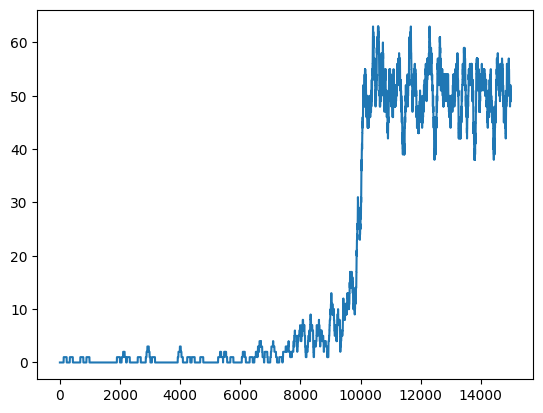

In [16]:
import gymnasium as gym
import numpy as np
import matplotlib.pyplot as plt
import pickle

def run(episodes, is_training=True, render=False):

    env = gym.make('FrozenLake-v1', map_name='8x8', is_slippery=True, render_mode='human' if render else None)

    if(is_training):
        q = np.zeros((env.observation_space.n, env.action_space.n)) # init a 64 x 4 array
    else:
        f = open('./data/frozen_lake8x8.pkl', 'rb')
        q = pickle.load(f)
        f.close()

    learning_rate_a = 0.9 # alpha or learning rate
    discount_factor_g = 0.9 # gamma or discount rate. Near 0: more weight/reward placed on immediate state. Near 1: more on future state.
    epsilon = 1 # 1 = 100% random actions
    epsilon_decay_rate = 0.0001 # epsilon decay rate. 1/0.0001 = 10,000
    rng = np.random.default_rng() # random number generator

    rewards_per_episode = np.zeros(episodes)

    for i in range(episodes):
        state = env.reset()[0] # states: 0 to 63, 0=top left corner,63=bottom right corner
        terminated = False # True when fall in hole or reached goal
        truncated = False # True when actions > 200

        while(not terminated and not truncated):
            if is_training and rng.random() < epsilon:
                action = env.action_space.sample() # actions: 0=left,1=down,2=right,3=up
            else:
                action = np.argmax(q[state,:])

            new_state, reward, terminated, truncated,_ = env.step(action)

            if is_training:
                q[state, action] = q[state,action] + learning_rate_a * (
                    reward + discount_factor_g * np.max(q[new_state]) - q[state, action]
                )

            state = new_state

        epsilon = max(epsilon - epsilon_decay_rate, 0)

        if epsilon == 0:
            learning_rate_a = 0.0001

        if reward == 1:
            rewards_per_episode[i] = 1

    env.close()

    sum_rewards = np.zeros(episodes)
    for t in range(episodes):
        sum_rewards[t] = np.sum(rewards_per_episode[max(0, t-100):(t+1)])

    plt.plot(sum_rewards)
    plt.savefig('./data/frozen_lake8x8.png')

    if is_training:
        f = open('./data/frozen_lake8x8.pkl','wb')
        pickle.dump(q, f)
        f.close()

if __name__ == '__main__':
    run(15000)
    #run(1000, is_training=False, render=True)
    #run(1, is_training=False, render=True)